In [1]:
# Reference:
# https://github.com/pyqtgraph/pyqtgraph/tree/master/pyqtgraph/examples/notebooks

RFBOutputContext()


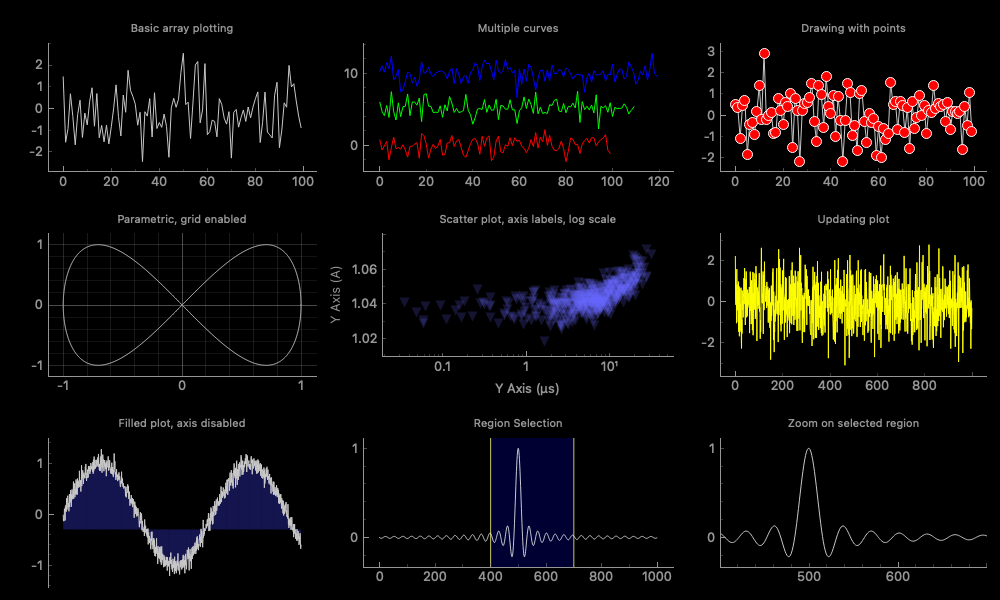

CustomGLW(css_height='600px', css_width='1000px')

In [2]:
"""
This example demonstrates many of the 2D plotting capabilities
in pyqtgraph. All of the plots may be panned/scaled by dragging with 
the left/right mouse buttons. Right click on any plot to show a context menu.
"""
from pyqtgraph.jupyter import GraphicsLayoutWidget
from IPython.display import display

import numpy as np
import pyqtgraph as pg

class CustomGLW(GraphicsLayoutWidget):
    def get_frame(self):
        # rather than eating up cpu cycles by perpetually updating "Updating plot",
        # we will only update it opportunistically on a redraw.
        # self.request_draw()
        update()
        return super().get_frame()

pg.mkQApp()
win = CustomGLW(css_width="1000px", css_height="600px")

# Enable antialiasing for prettier plots
pg.setConfigOptions(antialias=True)

p1 = win.addPlot(title="Basic array plotting", y=np.random.normal(size=100))

p2 = win.addPlot(title="Multiple curves")
p2.plot(np.random.normal(size=100), pen=(255,0,0), name="Red curve")
p2.plot(np.random.normal(size=110)+5, pen=(0,255,0), name="Green curve")
p2.plot(np.random.normal(size=120)+10, pen=(0,0,255), name="Blue curve")

p3 = win.addPlot(title="Drawing with points")
p3.plot(np.random.normal(size=100), pen=(200,200,200), symbolBrush=(255,0,0), symbolPen='w')


win.nextRow()

p4 = win.addPlot(title="Parametric, grid enabled")
x = np.cos(np.linspace(0, 2*np.pi, 1000))
y = np.sin(np.linspace(0, 4*np.pi, 1000))
p4.plot(x, y)
p4.showGrid(x=True, y=True)

p5 = win.addPlot(title="Scatter plot, axis labels, log scale")
x = np.random.normal(size=1000) * 1e-5
y = x*1000 + 0.005 * np.random.normal(size=1000)
y -= y.min()-1.0
mask = x > 1e-15
x = x[mask]
y = y[mask]
p5.plot(x, y, pen=None, symbol='t', symbolPen=None, symbolSize=10, symbolBrush=(100, 100, 255, 50))
p5.setLabel('left', "Y Axis", units='A')
p5.setLabel('bottom', "Y Axis", units='s')
p5.setLogMode(x=True, y=False)

p6 = win.addPlot(title="Updating plot")
curve = p6.plot(pen='y')
data = np.random.normal(size=(10,1000))
ptr = 0
def update():
    global curve, data, ptr, p6
    curve.setData(data[ptr%10])
    if ptr == 0:
        p6.enableAutoRange('xy', False)  ## stop auto-scaling after the first data set is plotted
    ptr += 1

win.nextRow()

p7 = win.addPlot(title="Filled plot, axis disabled")
y = np.sin(np.linspace(0, 10, 1000)) + np.random.normal(size=1000, scale=0.1)
p7.plot(y, fillLevel=-0.3, brush=(50,50,200,100))
p7.showAxis('bottom', False)


x2 = np.linspace(-100, 100, 1000)
data2 = np.sin(x2) / x2
p8 = win.addPlot(title="Region Selection")
p8.plot(data2, pen=(255,255,255,200))
lr = pg.LinearRegionItem([400,700])
lr.setZValue(-10)
p8.addItem(lr)

p9 = win.addPlot(title="Zoom on selected region")
p9.plot(data2)
def updatePlot():
    p9.setXRange(*lr.getRegion(), padding=0)
def updateRegion():
    lr.setRegion(p9.getViewBox().viewRange()[0])
lr.sigRegionChanged.connect(updatePlot)
p9.sigXRangeChanged.connect(updateRegion)
updatePlot()

display(win)
# win